In [22]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

In [ ]:
import boto3
import pandas as pd
import io

# some initial variables
bucket_name = "ds-education-la"
object_key = 'NYC_School_Data.xlsx'

# open client
client = boto3.client('s3')

### DOWNLOADING SINGLE OBJECTS FROM A BUCKET ###
response = client.get_object(
    Bucket=bucket_name,
    Key=object_key,
)

# read in data from request
data = response['Body'].read()

# transform into pandas dataframe by reading in bytes
df = pd.read_csv(io.BytesIO(data))

# print head
print(df.head())


In [2]:
df =pd.read_excel("NYC_School_Data.xlsx", sheet_name="All")

In [3]:
df

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,520,451.532684,121,23.269230,114,21.923077,146,28.076923,139,26.730770,285,54.807693
1,1,4,2023,All Students,497,457.867218,72,14.486921,130,26.156942,118,23.742455,177,35.613682,295,59.356136
2,1,5,2023,All Students,523,455.086029,108,20.650095,104,19.885277,155,29.636711,156,29.827915,311,59.464626
3,1,6,2023,All Students,518,455.171814,74,14.285714,127,24.517374,131,25.289576,186,35.907337,317,61.196911
4,1,7,2023,All Students,568,456.084503,102,17.957747,132,23.239437,154,27.112677,180,31.690142,334,58.802818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,32,5,2013,All Students,1193,287.536469,585,49.036045,430,36.043587,137,11.483655,41,3.436714,178,14.920369
2012,32,6,2013,All Students,1336,287.276184,562,42.065868,559,41.841316,150,11.227545,65,4.865270,215,16.092813
2013,32,7,2013,All Students,1290,287.060455,602,46.666668,459,35.581394,188,14.573644,41,3.178295,229,17.751938
2014,32,8,2013,All Students,1287,283.314697,622,48.329449,446,34.654236,168,13.053613,51,3.962704,219,17.016317


In [4]:
df.head()

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,1,3,2023,All Students,520,451.532684,121,23.269230,114,21.923077,146,28.076923,139,26.730770,285,54.807693
1,1,4,2023,All Students,497,457.867218,72,14.486921,130,26.156942,118,23.742455,177,35.613682,295,59.356136
2,1,5,2023,All Students,523,455.086029,108,20.650095,104,19.885277,155,29.636711,156,29.827915,311,59.464626
3,1,6,2023,All Students,518,455.171814,74,14.285714,127,24.517374,131,25.289576,186,35.907337,317,61.196911
4,1,7,2023,All Students,568,456.084503,102,17.957747,132,23.239437,154,27.112677,180,31.690142,334,58.802818


In [5]:
df.tail()

,District,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
2011,32,5,2013,All Students,1193,287.536469,585,49.036045,430,36.043587,137,11.483655,41,3.436714,178,14.920369
2012,32,6,2013,All Students,1336,287.276184,562,42.065868,559,41.841316,150,11.227545,65,4.865270,215,16.092813
2013,32,7,2013,All Students,1290,287.060455,602,46.666668,459,35.581394,188,14.573644,41,3.178295,229,17.751938
2014,32,8,2013,All Students,1287,283.314697,622,48.329449,446,34.654236,168,13.053613,51,3.962704,219,17.016317
2015,32,All Grades,2013,All Students,7507,286.360870,3539,47.142666,2773,36.938858,952,12.681498,243,3.236979,1195,15.918476


The levels describe the students brightness level. Level 1 means the studesnt are not bright contrastly level 4 tells us the students are very bright.

In [6]:
df.describe()

,District,Year,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,16.500000,2017.444444,3425.486111,415.624717,966.978175,29.548509,1115.217262,32.558570,840.407738,23.765375,502.882937,14.127546,1343.290675,37.892921
std,9.235383,3.236407,4365.506614,138.470835,1308.605499,12.332802,1466.512829,6.638226,1159.762462,8.398756,830.564855,10.669207,1935.036845,16.122492
min,1.000000,2013.000000,283.000000,271.509888,54.000000,3.566879,70.000000,9.913794,37.000000,5.836808,2.000000,0.220022,50.000000,7.878151
25%,8.750000,2015.000000,1189.750000,296.612579,311.000000,20.052864,380.000000,28.470462,232.000000,17.686576,90.000000,5.970236,336.750000,25.599187
50%,16.500000,2017.000000,2110.000000,314.813858,541.500000,28.480089,657.000000,33.256468,500.000000,23.705285,232.500000,11.479792,772.500000,36.801750
75%,24.250000,2019.000000,3461.250000,594.567657,974.750000,37.905693,1124.250000,37.380744,871.500000,28.909035,553.250000,19.828997,1448.500000,48.823724
max,32.000000,2023.000000,26947.000000,619.186890,10991.000000,66.666664,10424.000000,49.596050,8057.000000,56.066944,6843.000000,60.823753,13782.000000,82.738853


In [7]:
columns=df.columns
columns

Index(['District', 'Grade', 'Year', 'Category', 'Number Tested',
       'Mean Scale Score', '# Level 1', '% Level 1', '# Level 2', '% Level 2',
       '# Level 3', '% Level 3', '# Level 4', '% Level 4', '# Level 3+4',
       '% Level 3+4'],
      dtype='object')

In [8]:
df.shape

(2016, 16)

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


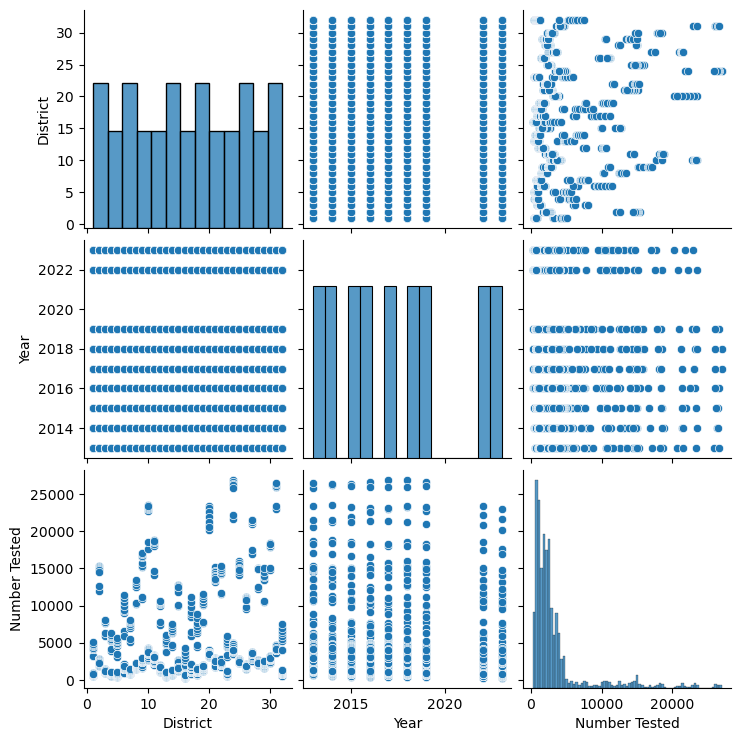

In [9]:
sns.pairplot(df.iloc[:,:5])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


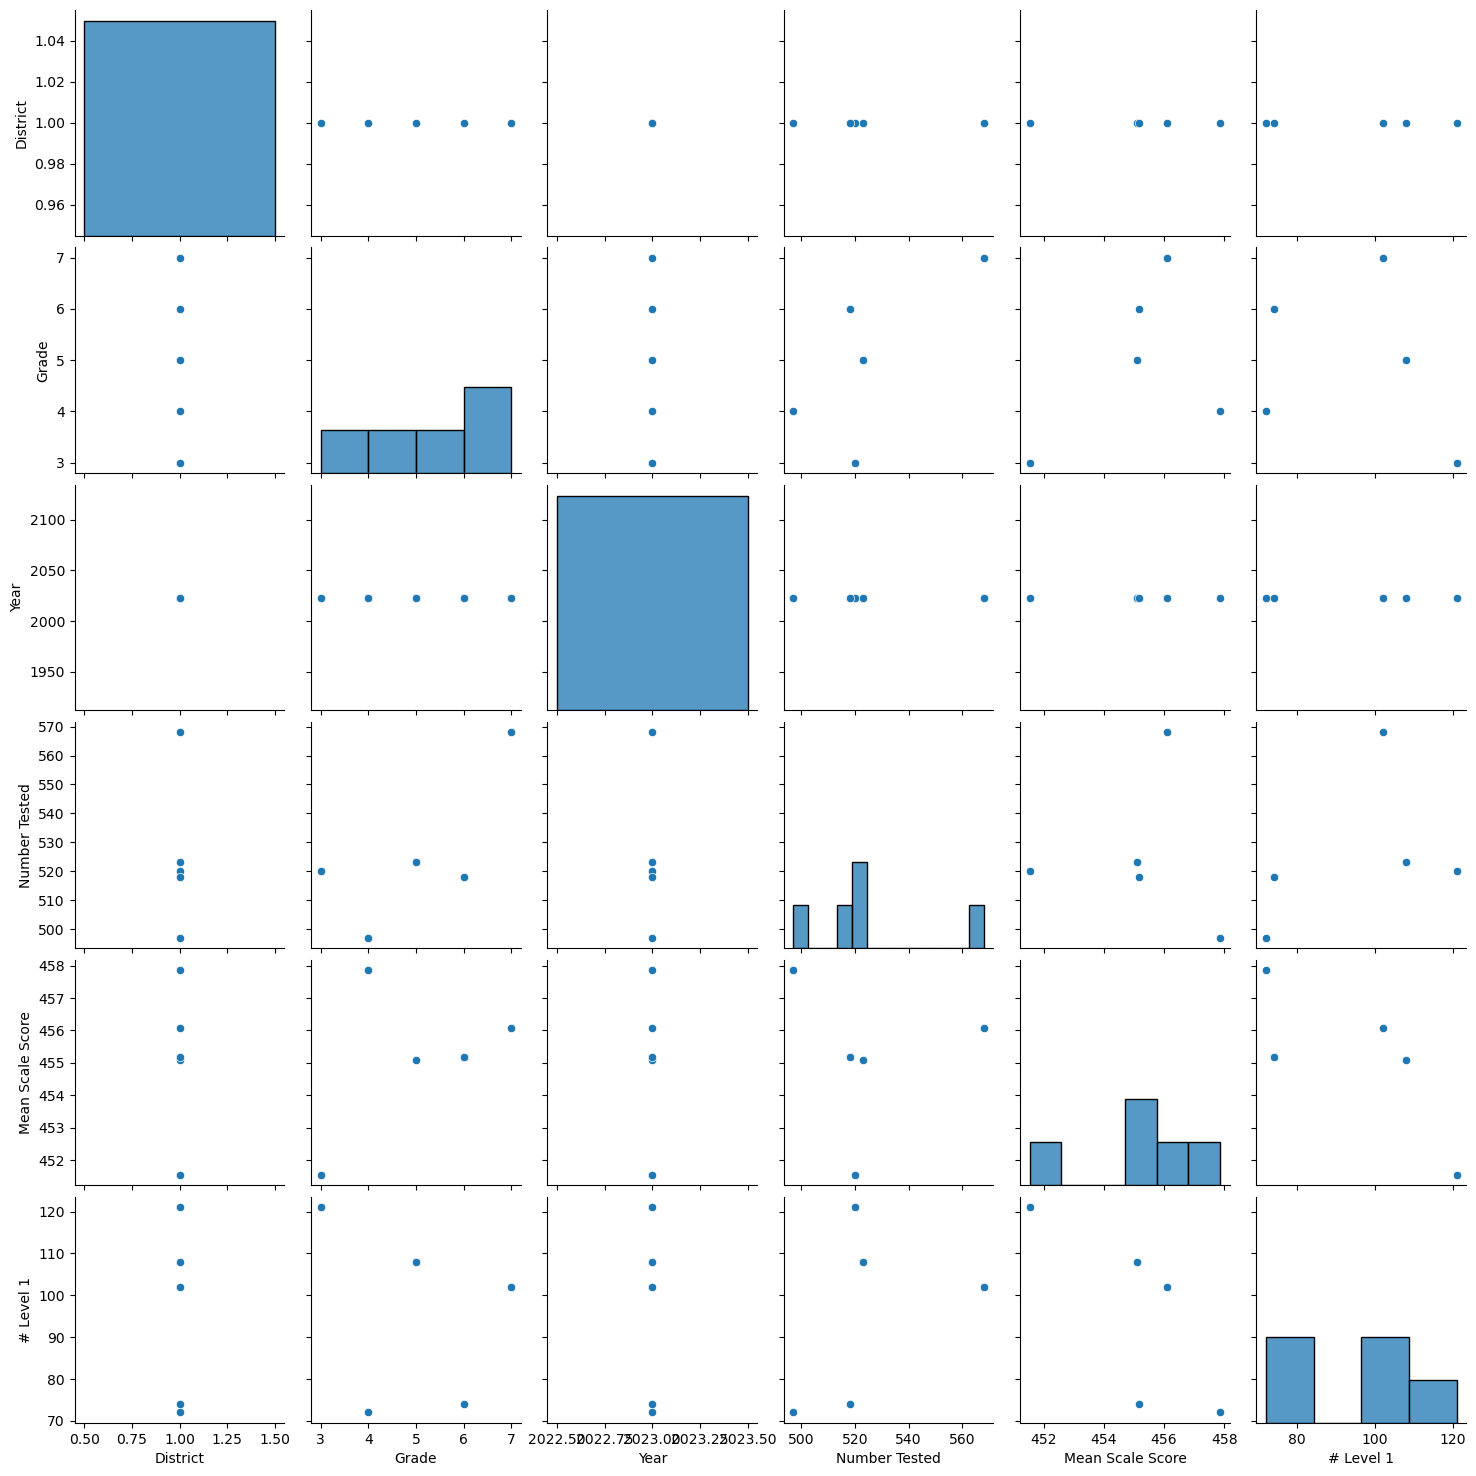

In [39]:
sns.pairplot(df.iloc[:5,:7])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


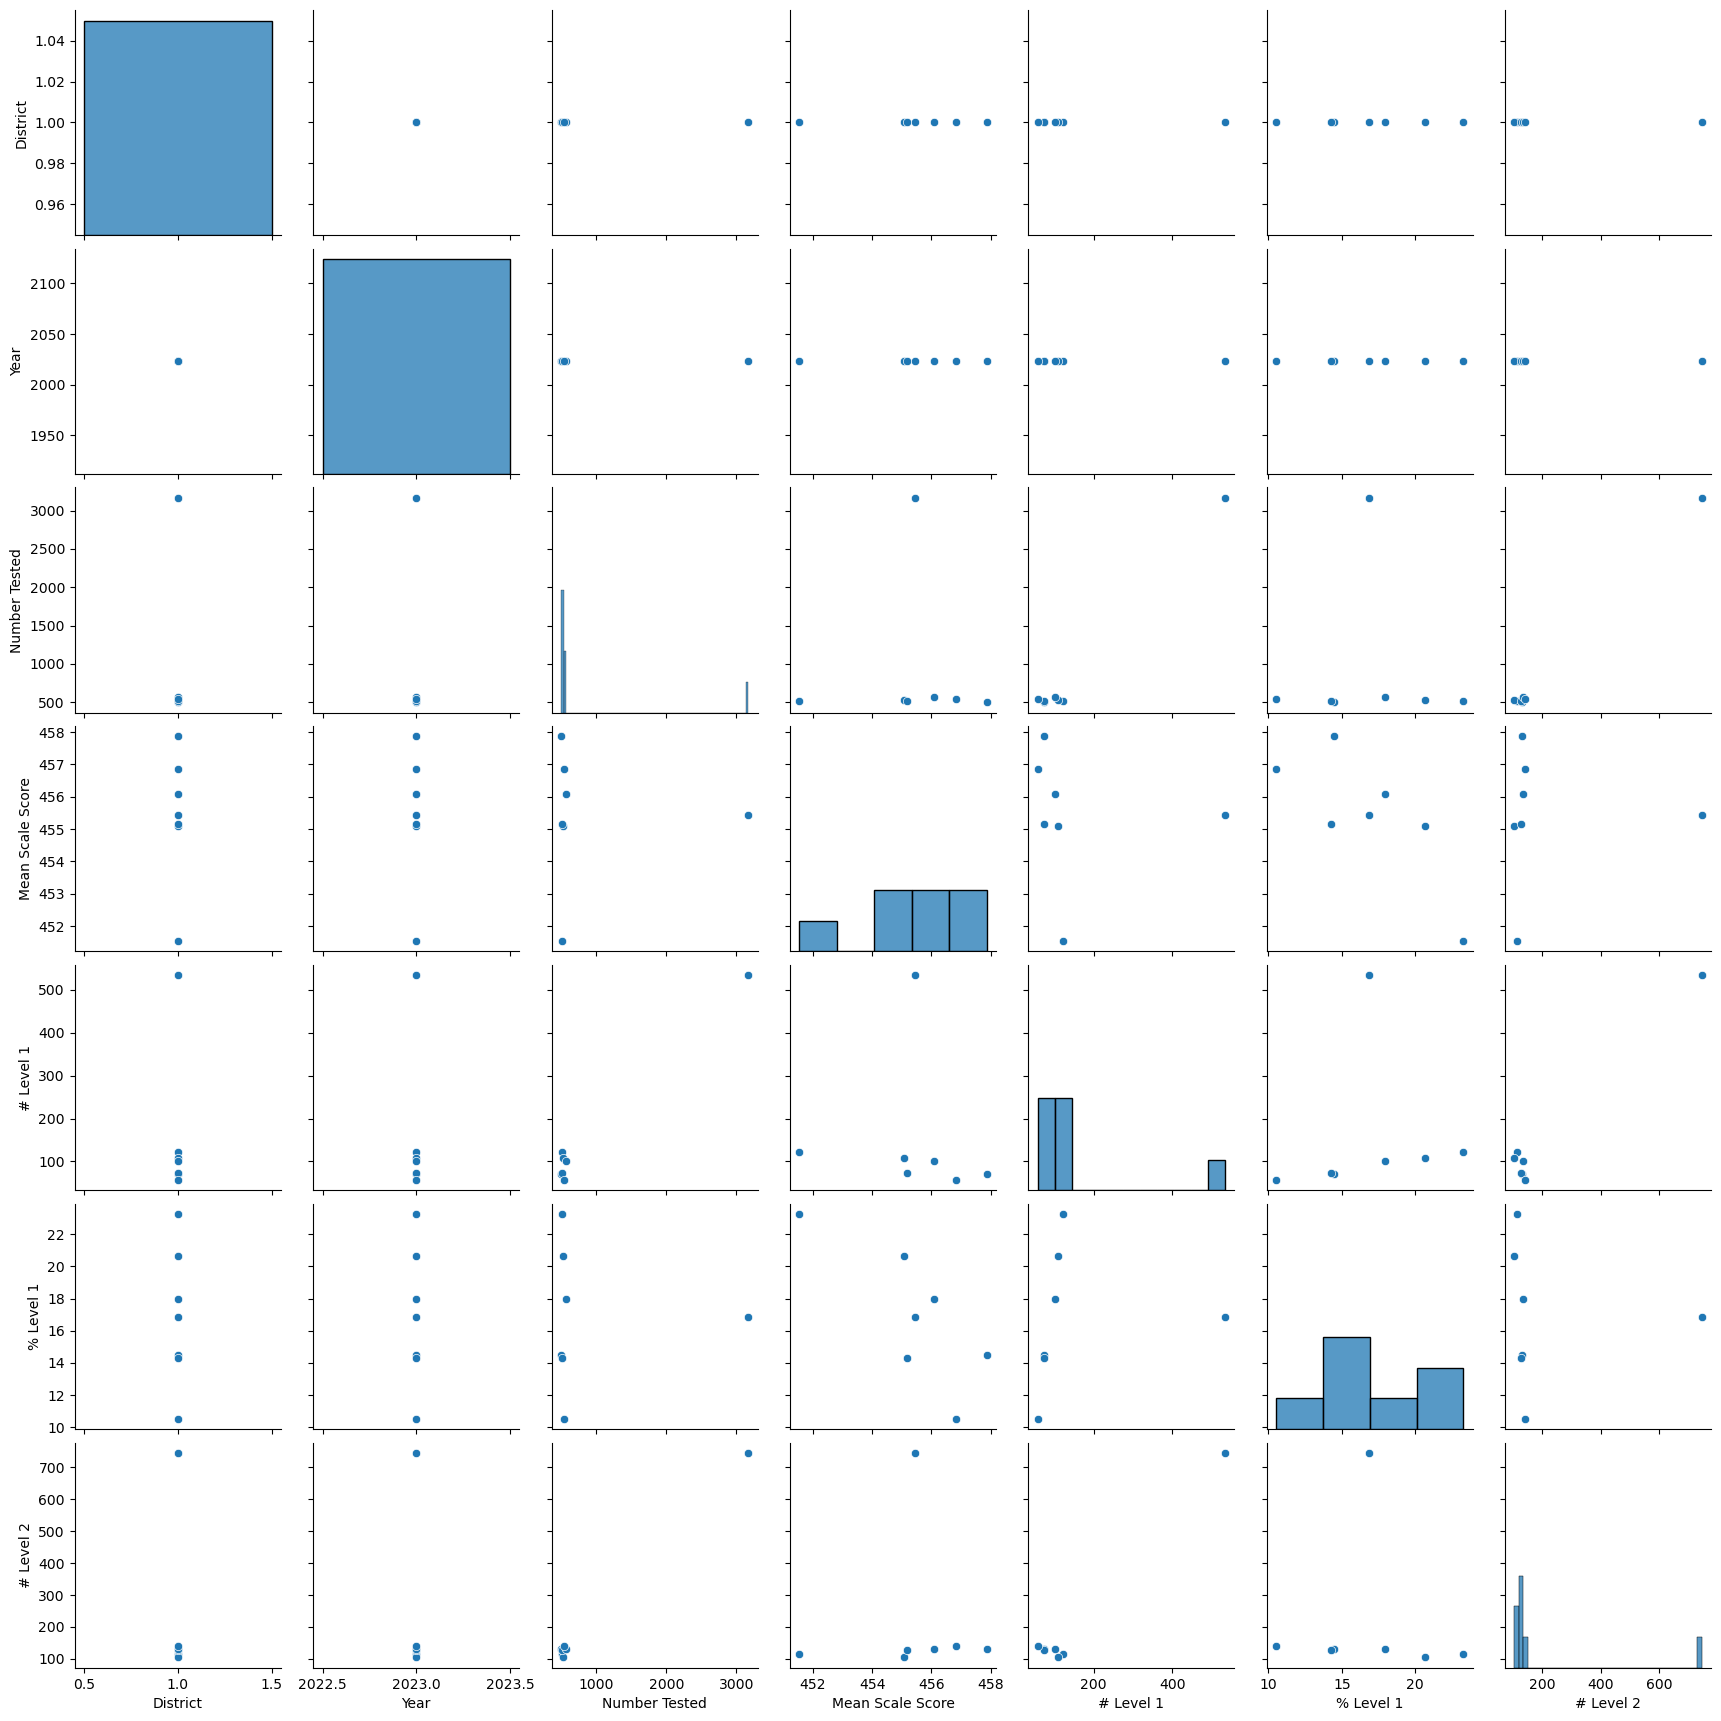

In [40]:
sns.pairplot(df.iloc[:7,:9])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


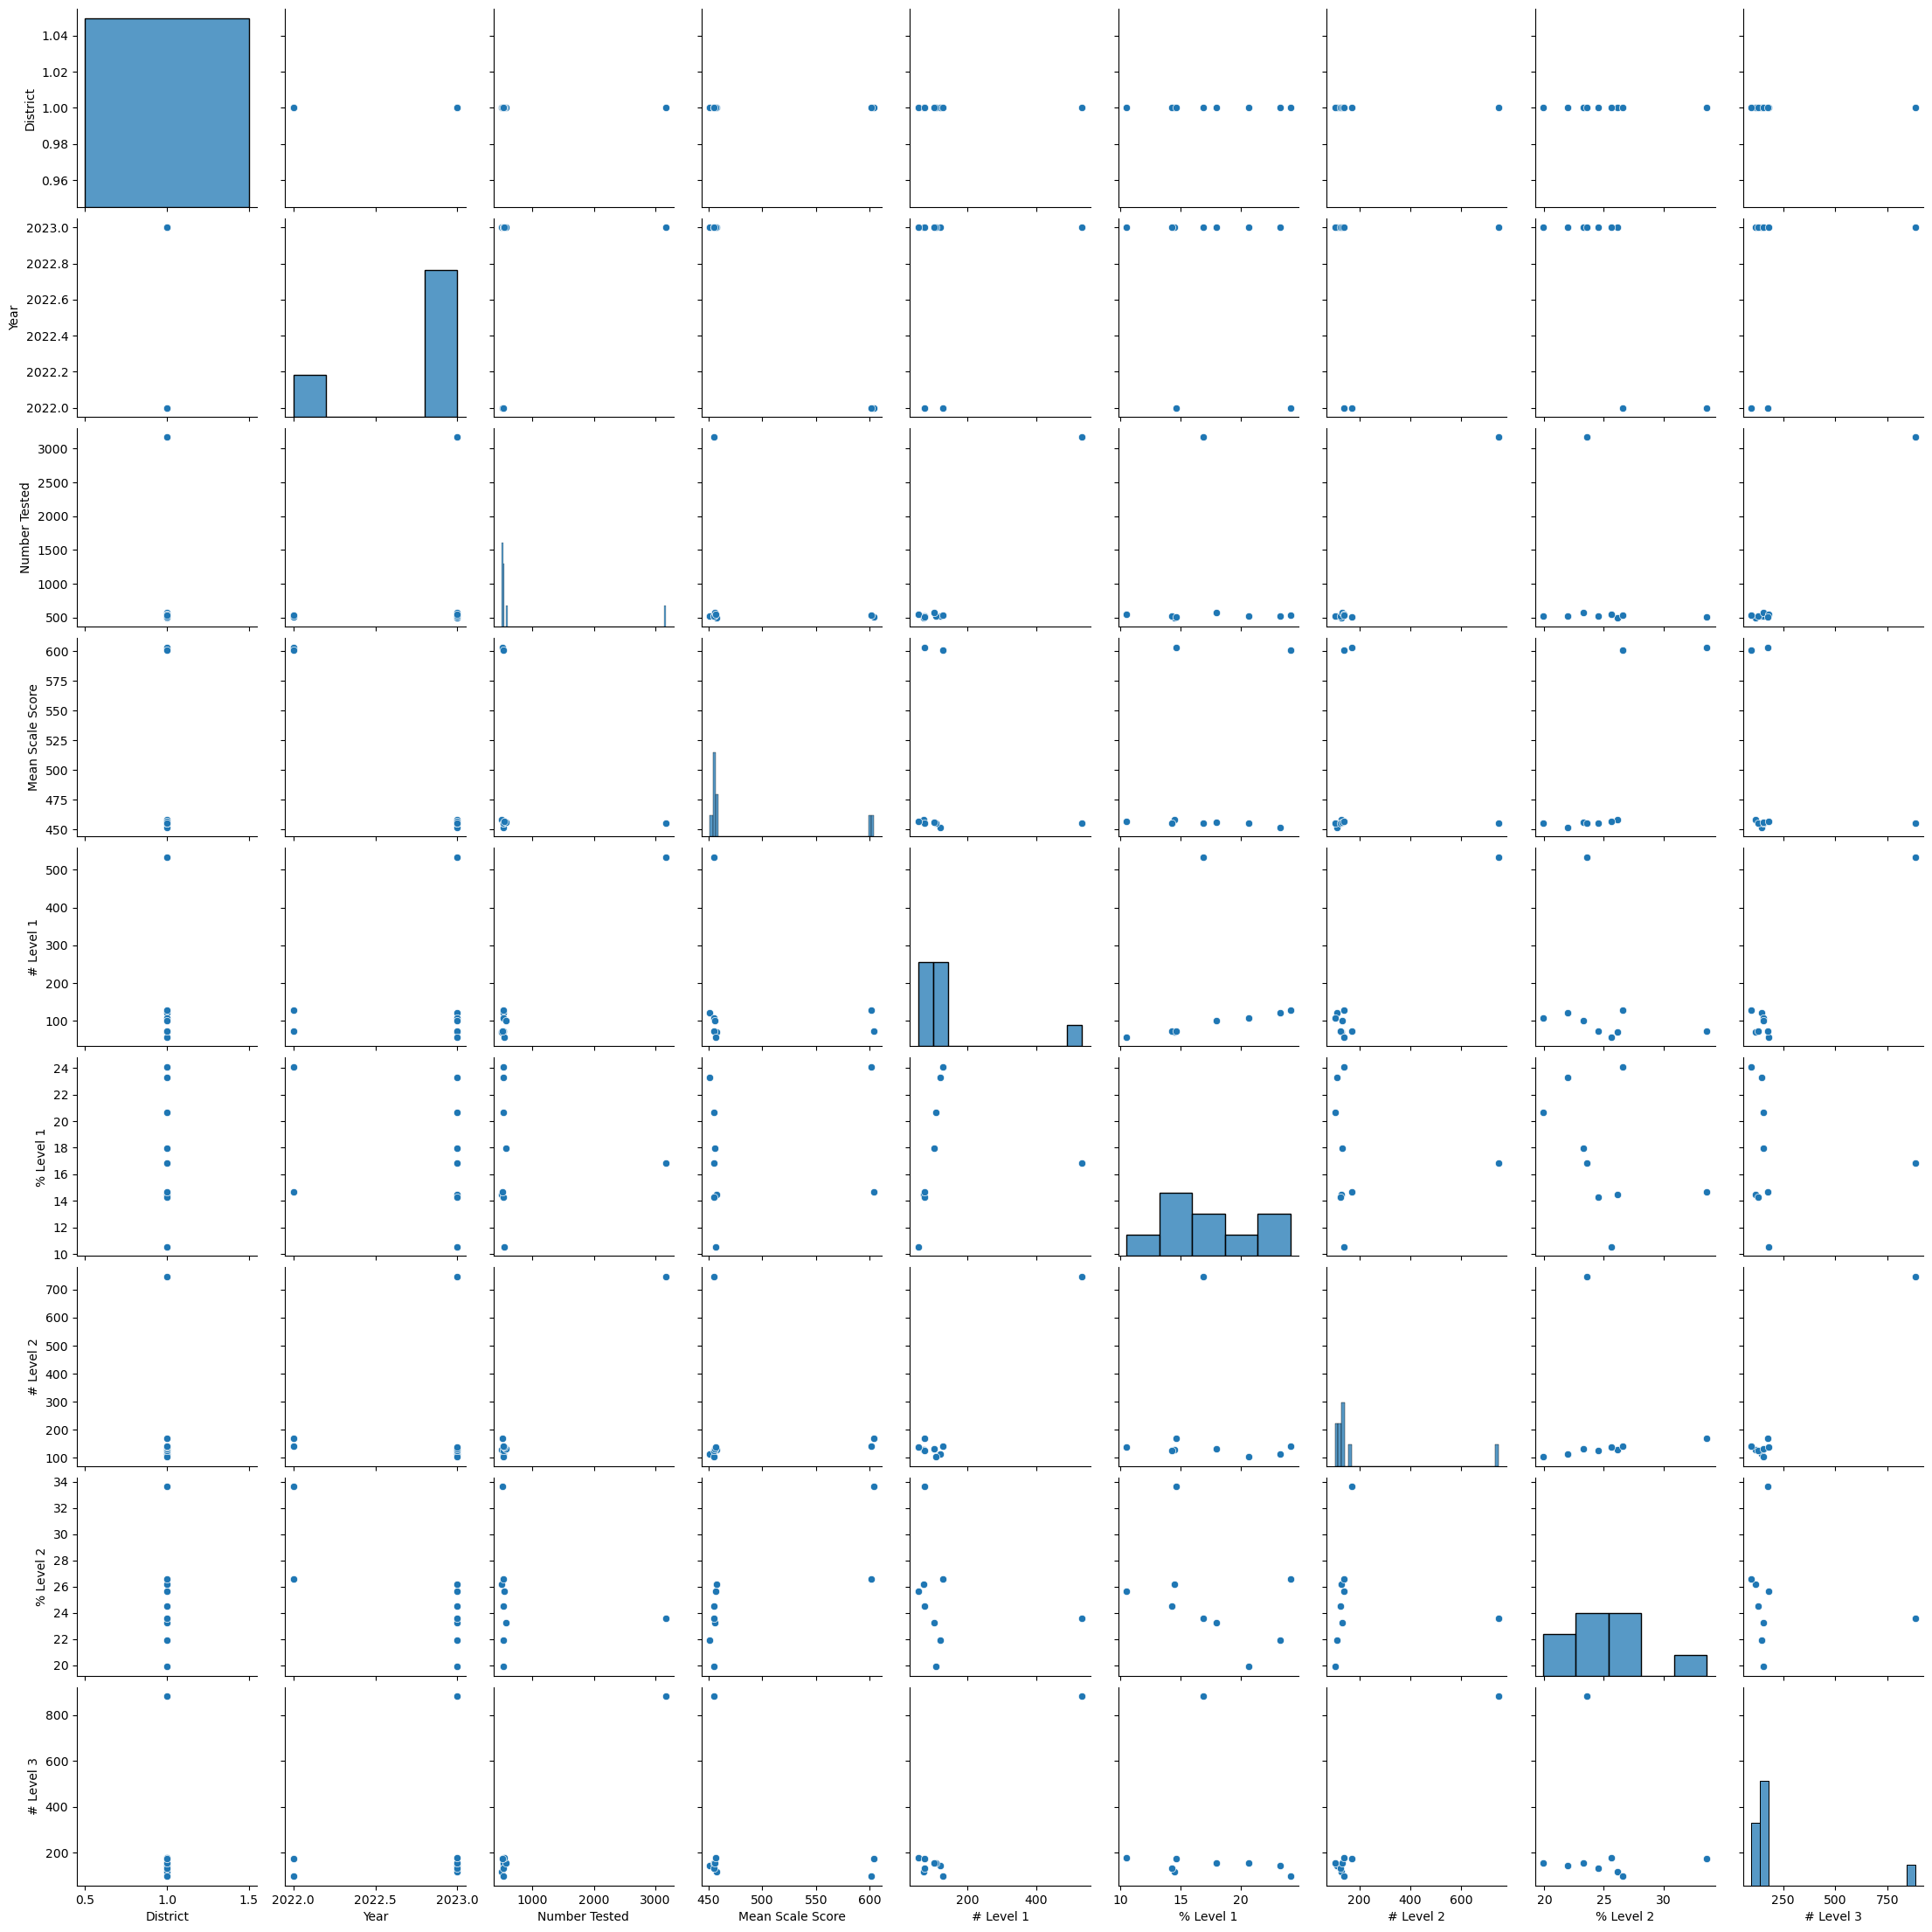

In [41]:
sns.pairplot(df.iloc[:9,:11])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


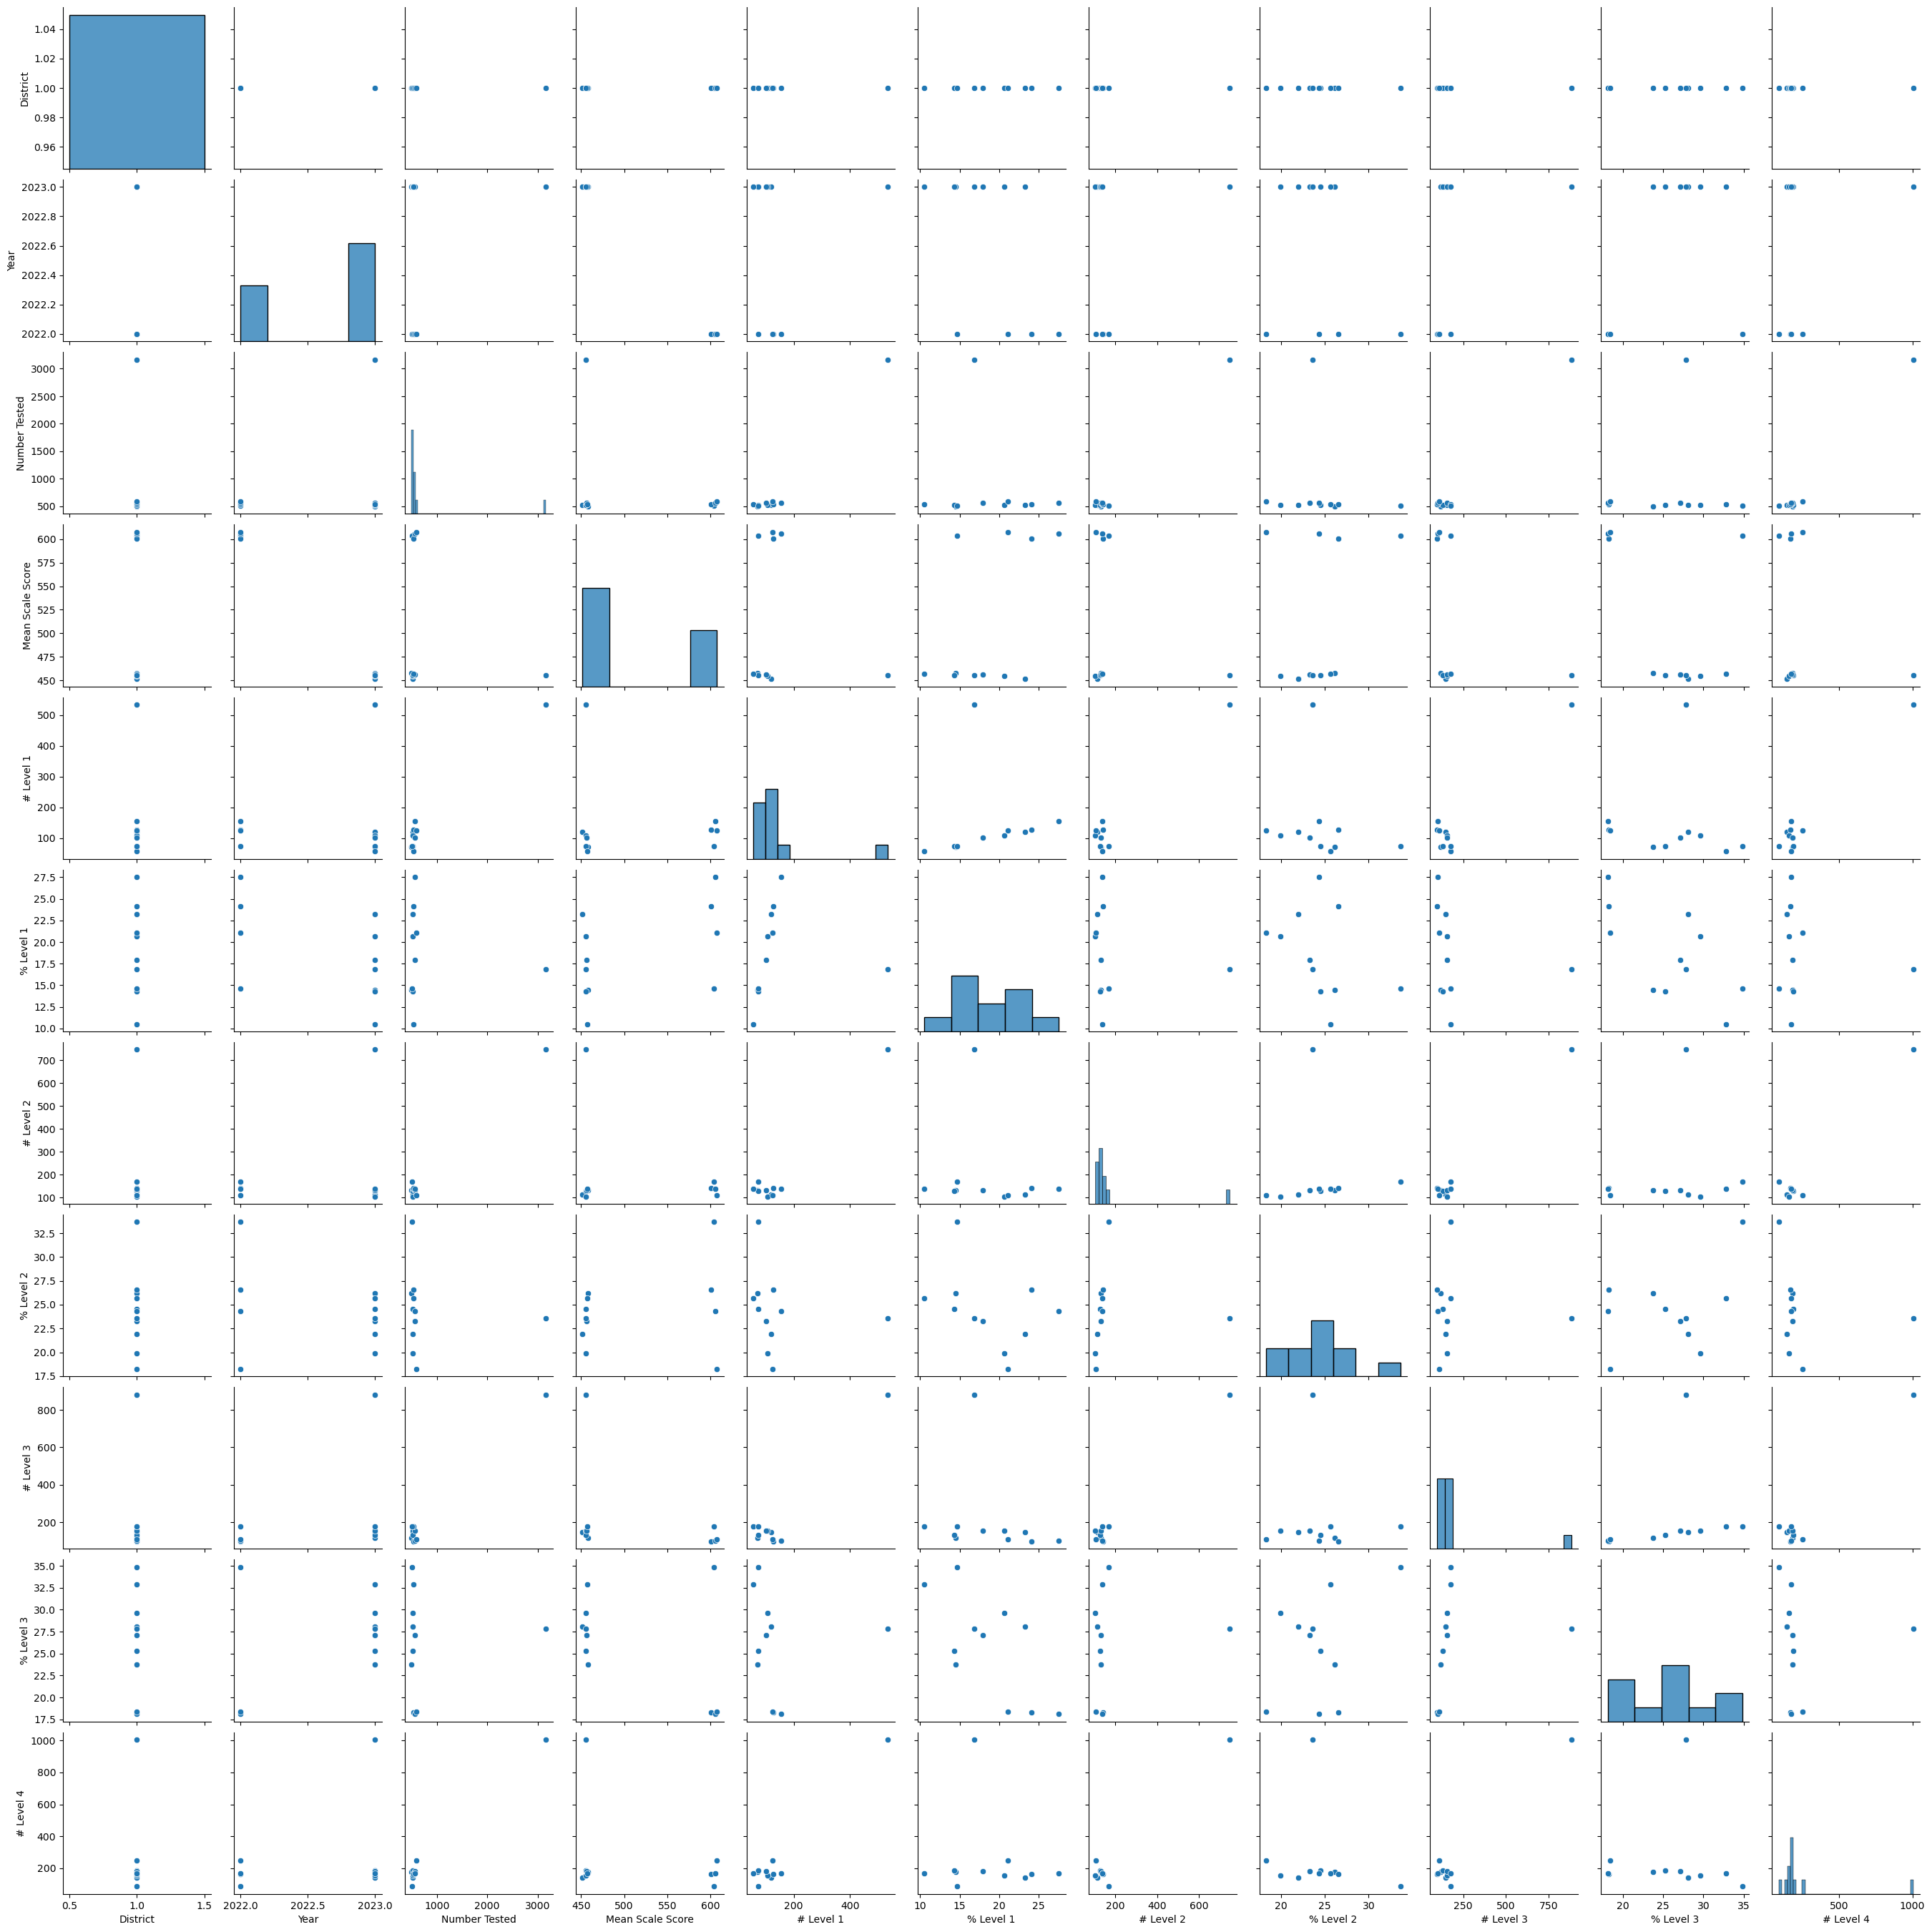

In [42]:
sns.pairplot(df.iloc[:11,:13])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


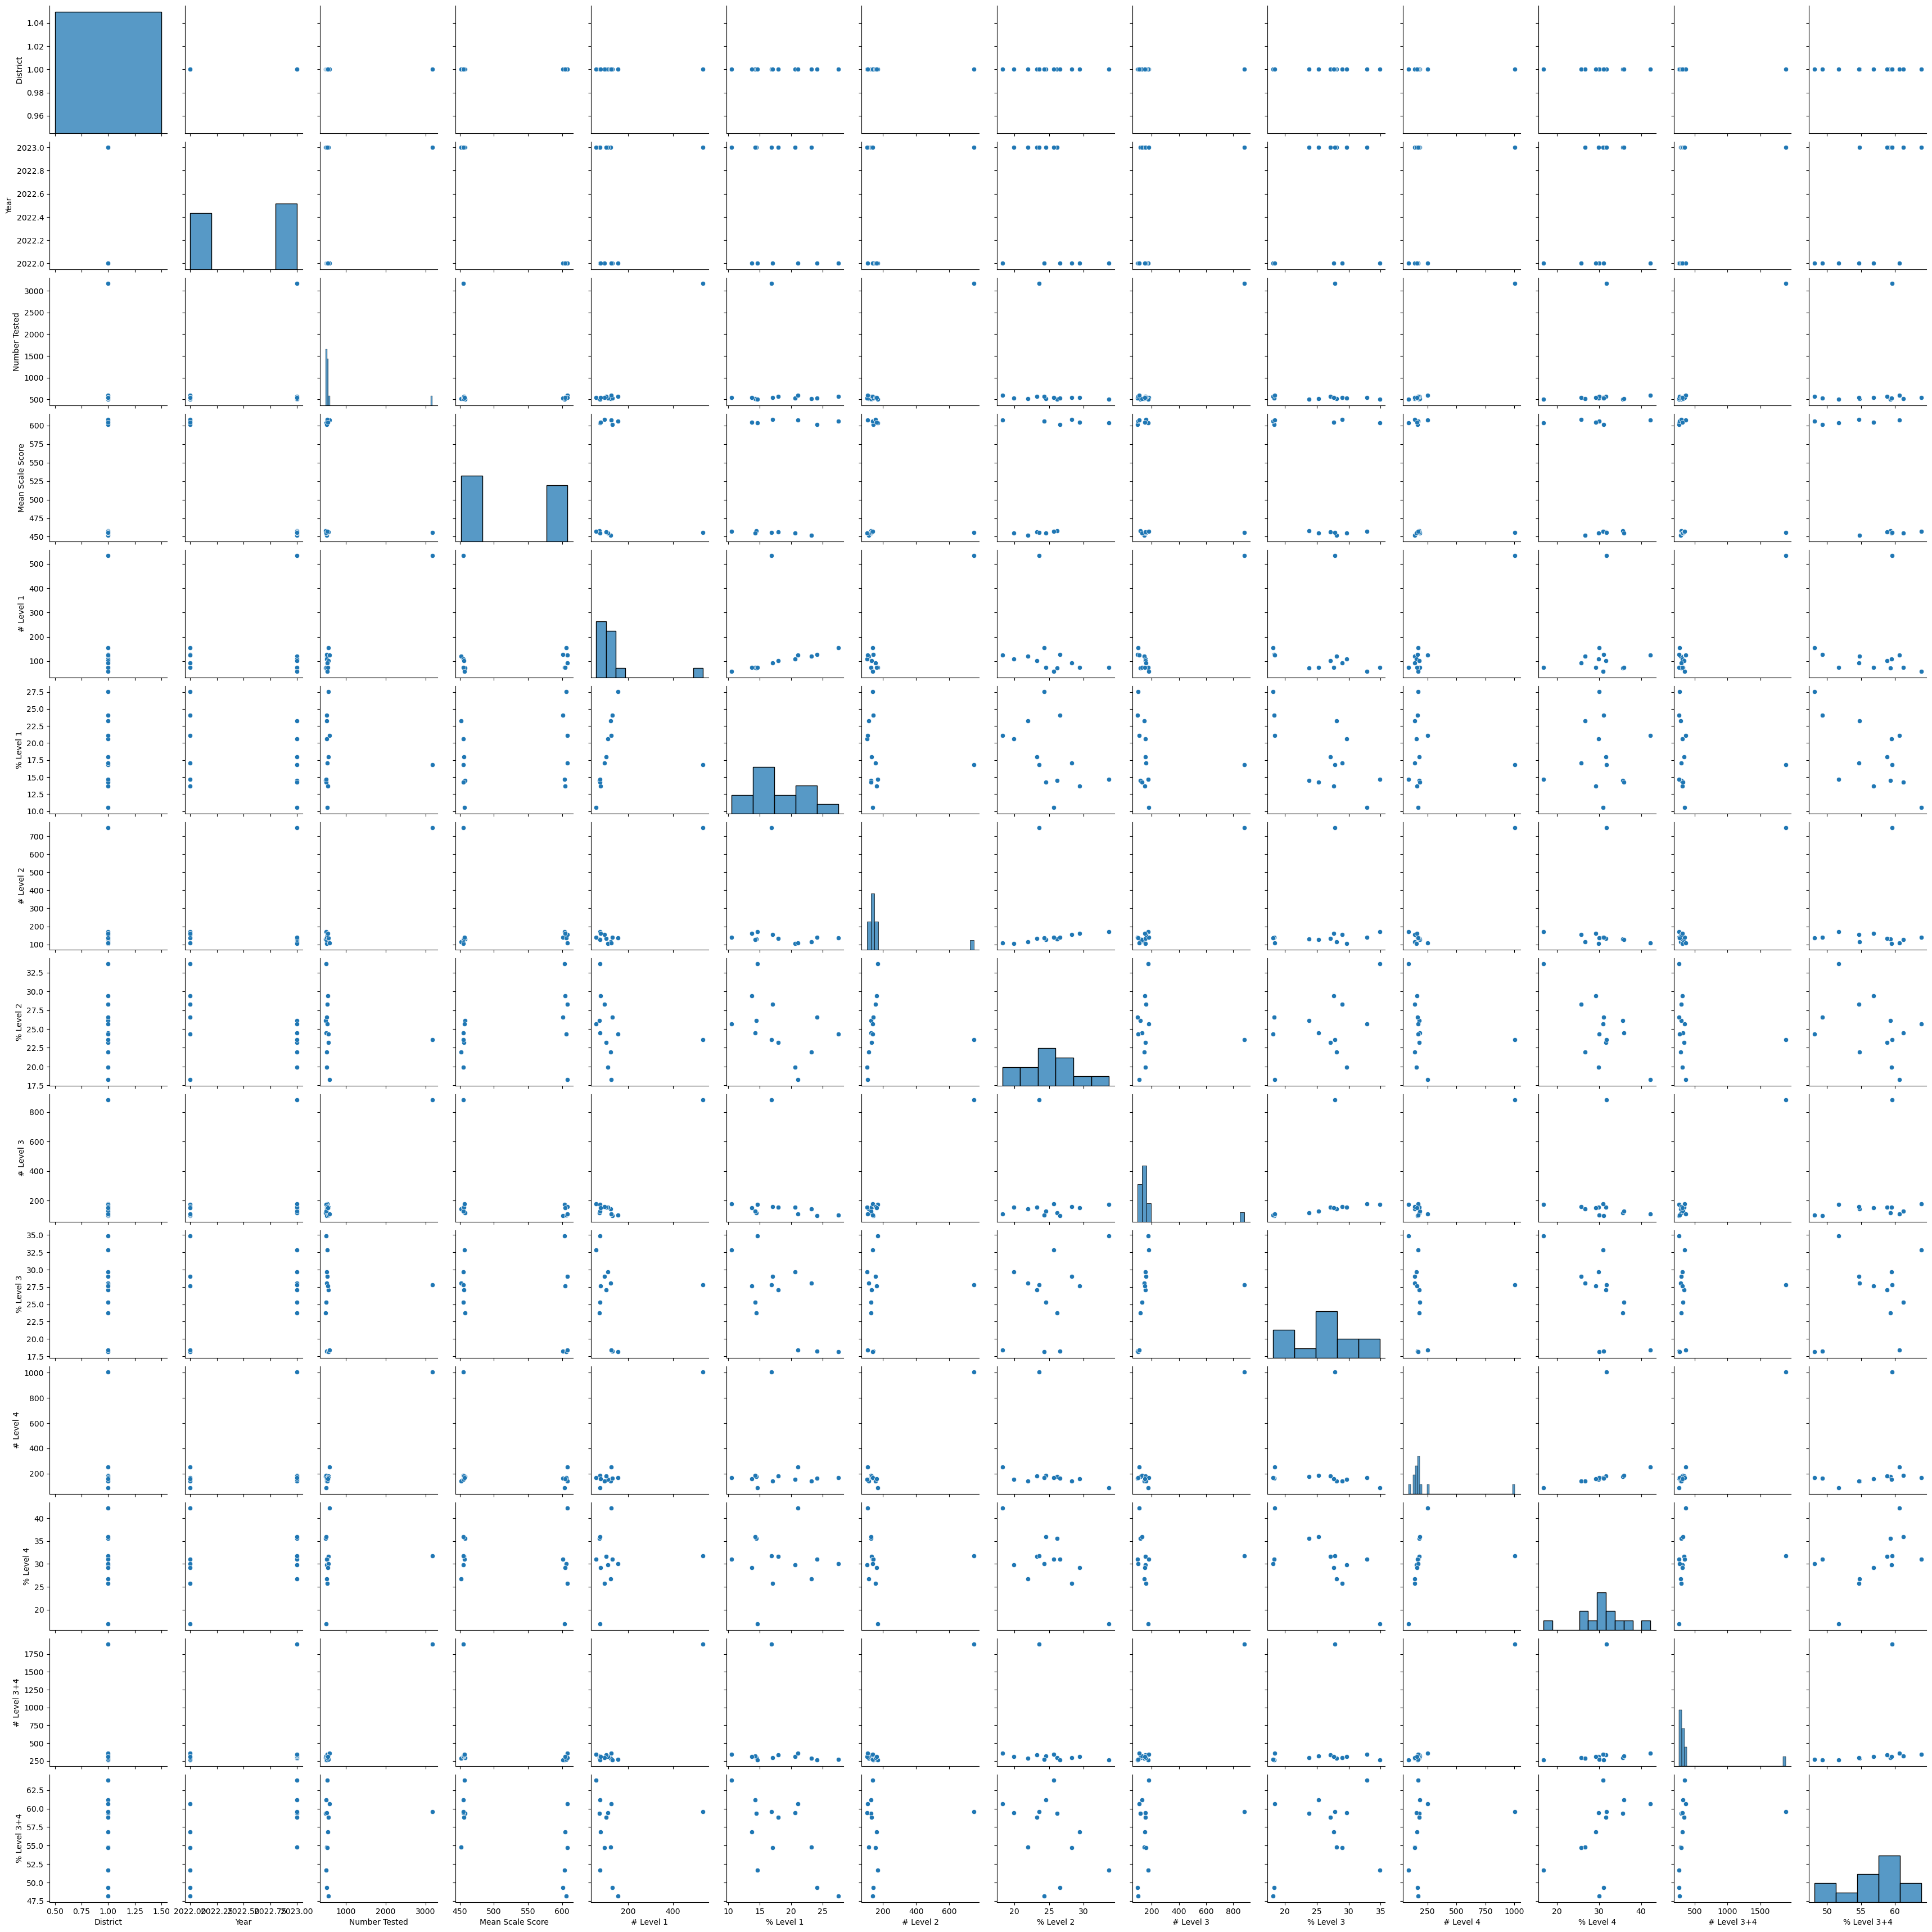

In [43]:
sns.pairplot(df.iloc[:13,:16])

3425.4861111111113

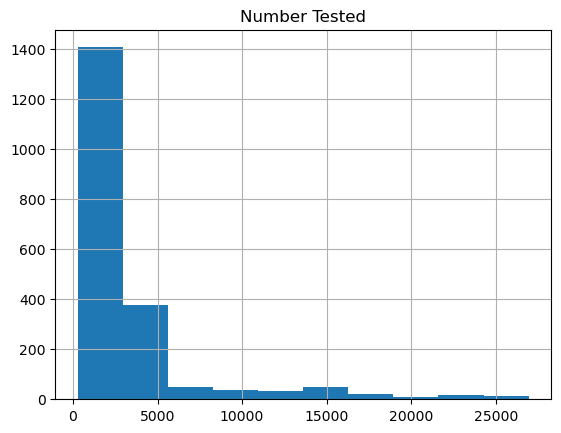

In [17]:
#plot histograms
df.hist(column = ["Number Tested"])
df["Number Tested"].mean()

This shows a right skewed histogram. It has a peak that is left of center and a more gradual tapering to the right side of the graph. This is a unimodal data set, with the mode closer to the left of the graph and smaller than either the mean or the median..

2017.4444444444443

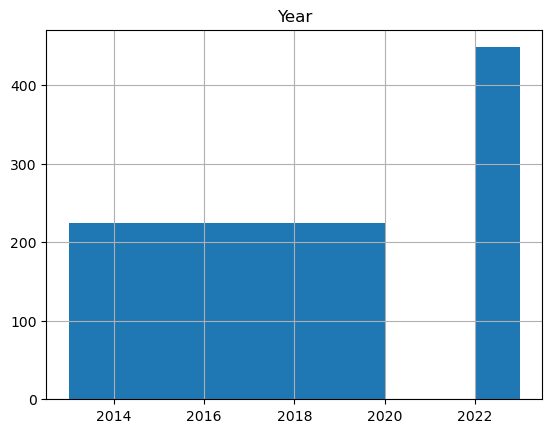

In [18]:
#plot histograms
df.hist(column = ["Year"])
df["Year"].mean()

There is consistency up until 2020.

16.5

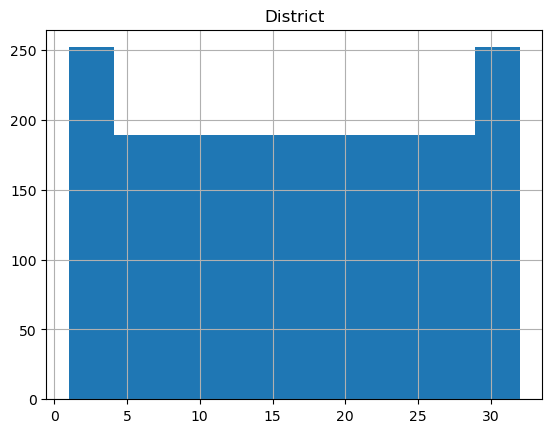

In [19]:
#plot histograms
df.hist(column = ["District"])
df["District"].mean()

1343.2906746031747

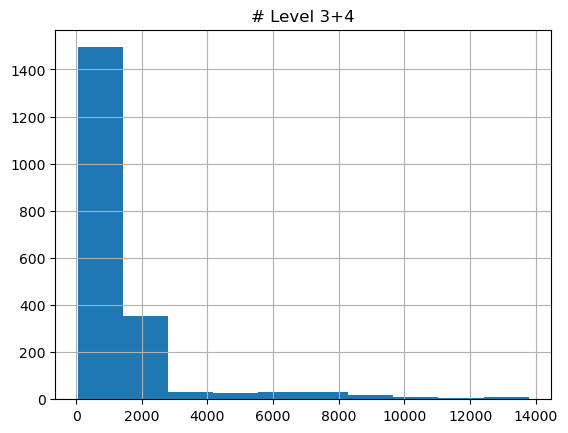

In [20]:
#plot histograms
df.hist(column = ["# Level 3+4"])
df["# Level 3+4"].mean()

This is a right-skewed histogram has a peak that is left of center and a more gradual tapering to the right side of the graph. This is a unimodal data set, with the mode closer to the left of the graph and smaller than either the mean or the median.

37.89292112891666

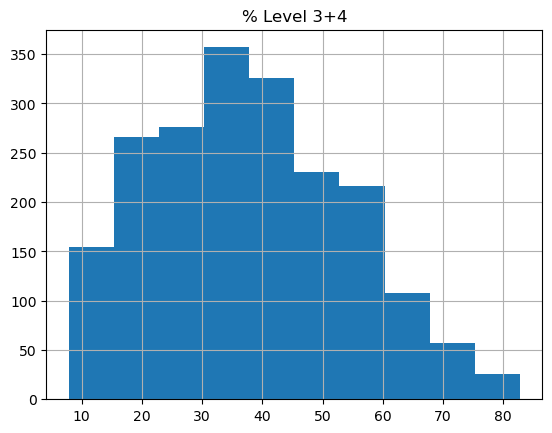

In [24]:
#plot histograms
df.hist(column = ["% Level 3+4"])
df["% Level 3+4"].mean()

This graph leans more to a right skewed.

966.9781746031746

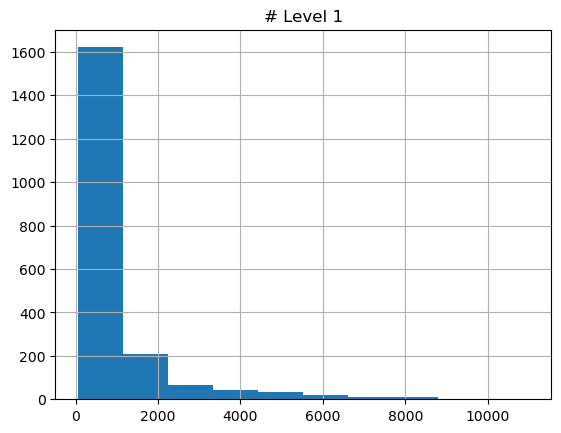

In [25]:
#plot histograms
df.hist(column = ["# Level 1"])
df["# Level 1"].mean()

29.548508765620536

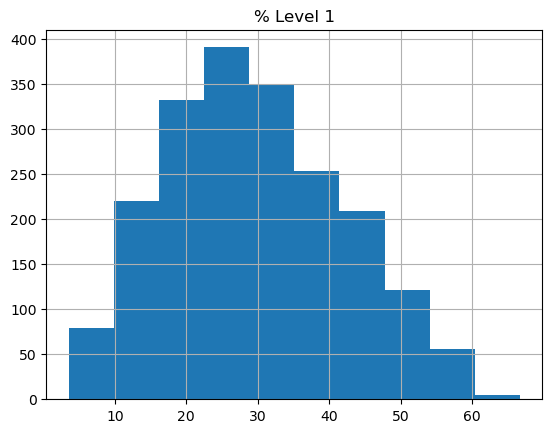

In [26]:
#plot histograms
df.hist(column = ["% Level 1"])
df["% Level 1"].mean()

<Axes: xlabel='% Level 3+4', ylabel='# Level 3+4'>

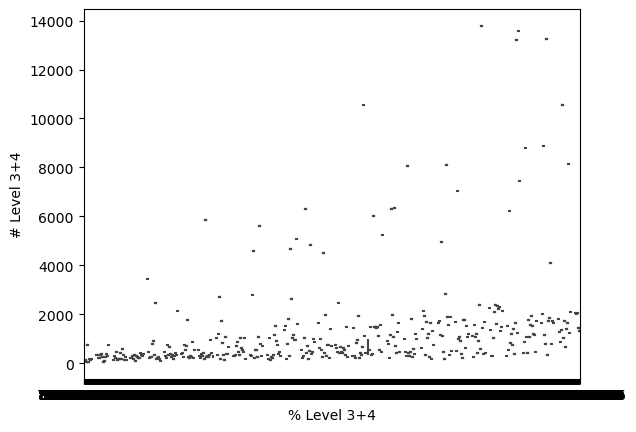

In [21]:
sns.boxplot(data=df, x="% Level 3+4", y="# Level 3+4", showfliers= False )

<Axes: xlabel='District', ylabel='% Level 3+4'>

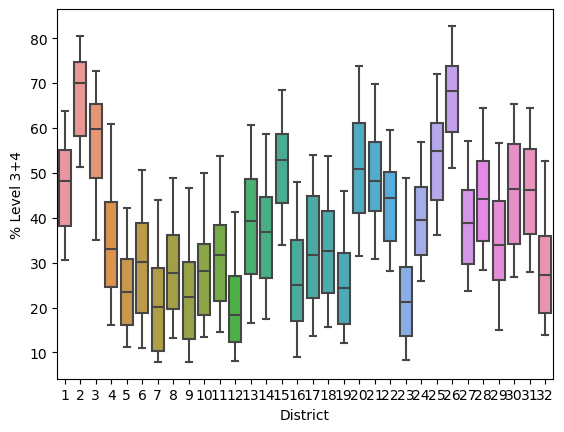

In [28]:
sns.boxplot(data=df, x="District", y="% Level 3+4", showfliers= False )

<Axes: xlabel='District', ylabel='% Level 1'>

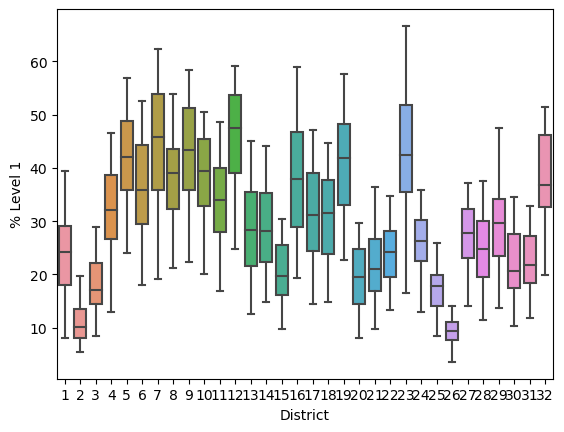

In [29]:
sns.boxplot(data=df, x="District", y="% Level 1", showfliers= False )

<Axes: xlabel='Year', ylabel='% Level 3+4'>

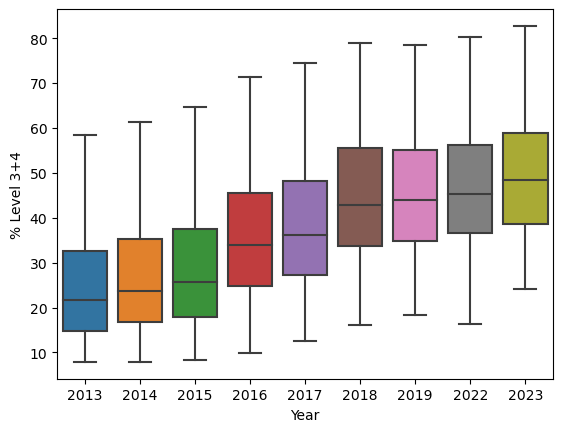

In [30]:
sns.boxplot(data=df, x="Year", y="% Level 3+4", showfliers= False )

<Axes: xlabel='Year', ylabel='% Level 1'>

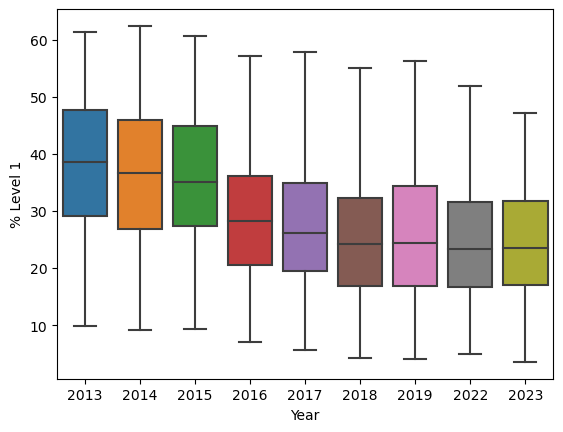

In [32]:
sns.boxplot(data=df, x="Year", y="% Level 1", showfliers= False )